In [511]:
# Import de nos librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Anime Data Analysis
Un projet d'analyse sur un jeu de données basé sur l'animation japonaise. Le jeu de données est basé sur les informations du site MyAnimeList, en 2023.

# Présentation du jeu de données

In [512]:
# On importe notre jeu de données
df = pd.read_csv("./data/anime-dataset-2023.csv")

# I. Nettoyage du jeu de données

In [513]:
# TRI DES DONNEES
# Avant de commencer notre analyse, un tri doit être effectué, on retire les animés avec des données non pertinentes : Score non renseigné, ou colonnes qui ne seront pas analysée.
df = df.loc[(df["Score"] != "UNKNOWN") & (df["Type"] != "UNKNOWN")]
df = df.drop(columns=["Producers", "Licensors", "Synopsis", "Image URL"])
df["Source"] = df["Source"].replace("Unknown", "Other")




In [514]:
# On vérifie qu'il n'y a aucune valeur nulle
df.isnull().sum()

anime_id        0
Name            0
English name    0
Other name      0
Score           0
Genres          0
Type            0
Episodes        0
Aired           0
Premiered       0
Status          0
Studios         0
Source          0
Duration        0
Rating          0
Rank            0
Popularity      0
Favorites       0
Scored By       0
Members         0
dtype: int64

In [515]:
# On supprime les doublons
df = df.drop_duplicates()

# II. Statistiques générales
On commence à manipuler notre jeu de données avec des statistiques très générales qui nous permettent de mieux comprendre notre fichier et son fonctionnement.

In [516]:
# Statistiques générales de notre jeu de données
df[["Score", "Episodes", "Rank", "Popularity", "Favorites", "Scored By", "Members"]].describe()


,Popularity,Favorites,Members
count,15691.000000,15691.000000,1.569100e+04
mean,8207.934039,683.436747,5.832234e+04
std,4909.824413,5468.492656,1.943770e+05
min,1.000000,0.000000,1.800000e+02
25%,3997.000000,1.000000,1.170500e+03
50%,8075.000000,7.000000,4.918000e+03
75%,12155.000000,60.000000,2.690500e+04
max,19191.000000,217606.000000,3.744541e+06


In [559]:
print("Dimensions :", df.shape)

Dimensions : (15691, 20)


In [517]:
# On jette un œil au nombre unique de valeurs de chaque ligne
df.nunique()

anime_id        15691
Name            15691
English name     7915
Other name      14917
Score             566
Genres            952
Type                6
Episodes          193
Aired           11332
Premiered         234
Status              2
Studios          1353
Source             16
Duration          315
Rating              7
Rank             9685
Popularity      12499
Favorites        1799
Scored By        8280
Members         10564
dtype: int64

On remarque que près de la moitié des animés du jeu de données ne possède pas de nom anglophone, mais très souvent un autre nom (écriture en japonais, ou même titre anglais finalement !)

In [518]:
# On affiche les cinq premières lignes
df.head()

,anime_id,Name,English name,Other name,Score,Genres,Type,Episodes,Aired,Premiered,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",spring 1998,Finished Airing,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi",Movie,1.0,"Sep 1, 2001",UNKNOWN,Finished Airing,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",spring 1998,Finished Airing,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",TV,26.0,"Jul 3, 2002 to Dec 25, 2002",summer 2002,Finished Airing,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",TV,52.0,"Sep 30, 2004 to Sep 29, 2005",fall 2004,Finished Airing,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001


In [519]:
# On affiche les cinq dernières
df.tail()

,anime_id,Name,English name,Other name,Score,Genres,Type,Episodes,Aired,Premiered,Status,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members
24590,55355,Li Shi Zhentan Shiwusuo: A Day in Lungmen - Ho...,Lee's Detective Agency: A Day in Lungmen - Hom...,《鲤氏侦探事务所》迷你剧先行短片 - Home Service,5.99,"Action, Comedy, Mystery",ONA,1.0,"Oct 24, 2021",UNKNOWN,Finished Airing,"HMCH, Gravity Well",Game,3 min,PG-13 - Teens 13 or older,8891.0,14796,1,129.0,518
24635,55404,Slash,Slash,slash,6.45,UNKNOWN,Music,1.0,"May 22, 2023",UNKNOWN,Finished Airing,UNKNOWN,Original,4 min,PG-13 - Teens 13 or older,UNKNOWN,16801,1,152.0,333
24729,55517,The IDOLM@STER Cinderella Girls: U149 Recap,UNKNOWN,アイドルマスター シンデレラガールズ U149,6.07,UNKNOWN,Special,1.0,"May 25, 2023",UNKNOWN,Finished Airing,CygamesPictures,Web manga,23 min,PG-13 - Teens 13 or older,8521.0,15097,1,114.0,482
24831,55647,One Piece: Dai Gekisen Tokushuu! Hangeki Doume...,One Piece: Recapping Fierce Fights! The Counte...,大激戦特集！反撃同盟VSビッグ・マム,6.29,"Action, Adventure, Comedy, Fantasy",Special,1.0,"Jun 18, 2023",UNKNOWN,Finished Airing,UNKNOWN,Manga,24 min,PG-13 - Teens 13 or older,7480.0,14291,1,320.0,593
24856,55676,Fins,Fins,Fins,6.45,UNKNOWN,Music,1.0,"Jun 6, 2023",UNKNOWN,Finished Airing,UNKNOWN,Original,4 min,G - All Ages,UNKNOWN,14842,2,194.0,512


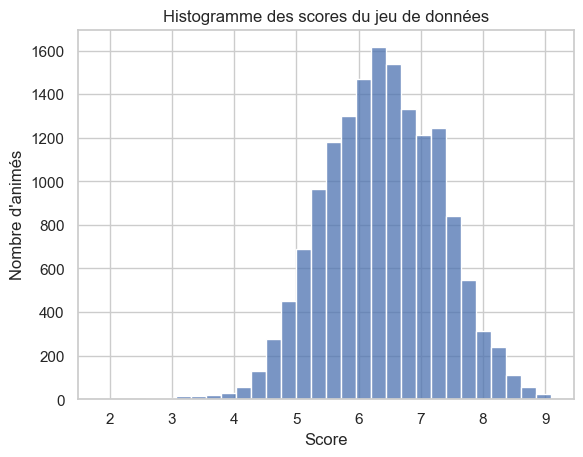

In [564]:
sns.histplot(data=df, x="Score", bins=30)
plt.title("Histogramme des scores du jeu de données")
plt.xlabel("Score")
plt.ylabel("Nombre d'animés")
plt.show()

In [565]:
# On compte nos différentes valeurs par type.
df["Type"].value_counts()

Type
TV         4482
OVA        3283
Movie      2475
Special    2039
ONA        1929
Music      1483
Name: count, dtype: int64

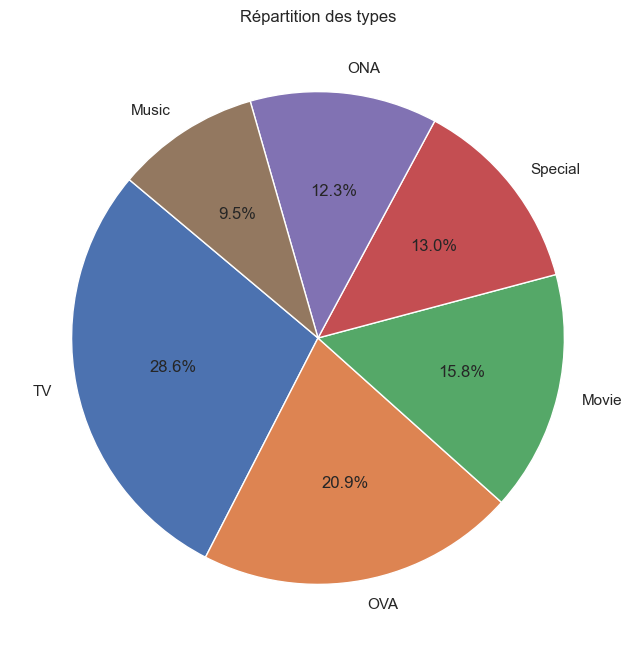

In [521]:
counts = df["Type"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Répartition des types")
plt.show()

## 1. TV
Nous commençons notre analyse détaillée du jeu de données en prenant tout d'abord le Type TV, dans lequel nous analyserons les scores, ou encore la popularité.

Ce que le type TV désigne sont bien sûr les diffusions à travers la télévision, donc principalement des animés. On parlera ainsi essentiellement d'animé, si besoin, on précisera qu'il s'agit du type TV.

Un animé désigne l'adaptation d'un manga, d'un light novel (roman), d'un visual novel (jeu), ou une création originale dans un format dessin animé dont un studio d'animation est en charge.
On effectue la nuance avec "dessin animé" (cartoon), qui est associé à l'Occident (Europe, États-Unis), là où un "animé", proviendra donc d'Asie, principalement du Japon, mais aussi de la Corée du Sud et de la Chine.

In [525]:
# On récupère uniquement nos TV du jeu de données
df_anime = df[df["Type"] == "TV"]

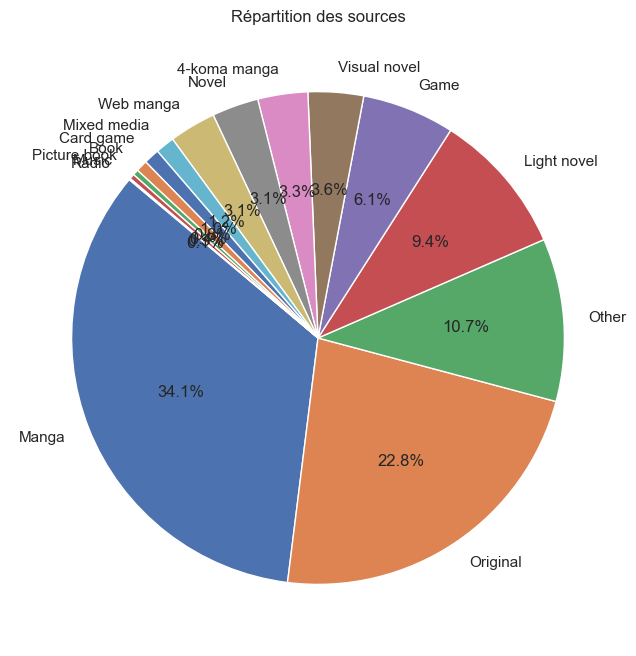

In [526]:
counts = df_anime["Source"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Répartition des sources")
plt.show()

Remarque : Other représente généralement tout ce qui ne provient pas des sources mentionnées : on retrouve généralement les animés réalisés pour promouvoir un jouet (exemple : BeyBlade)

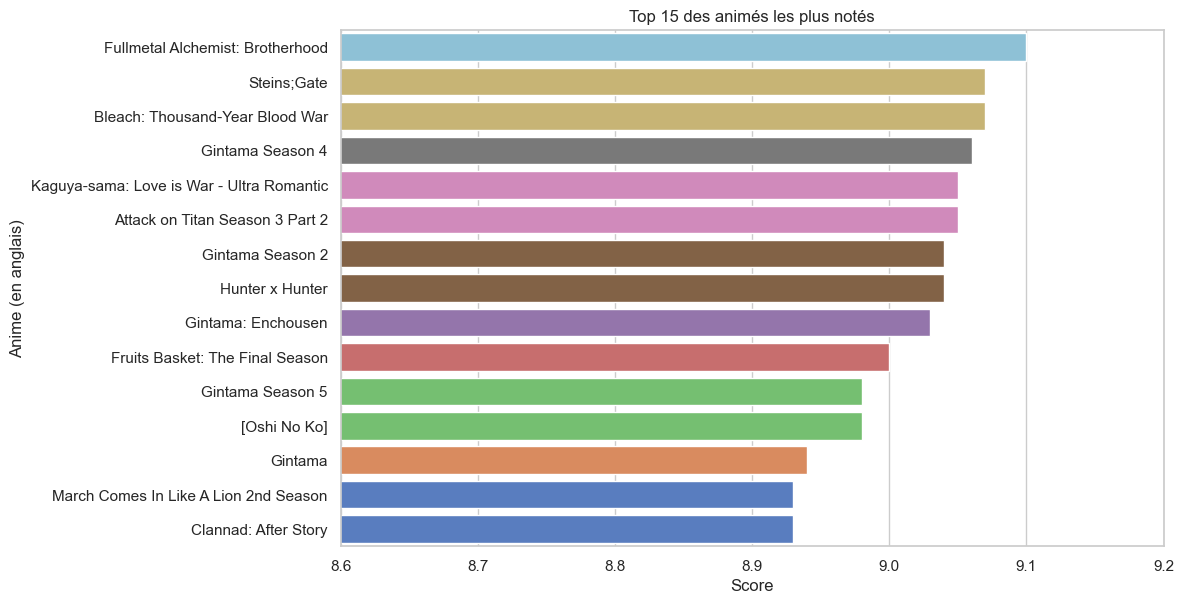

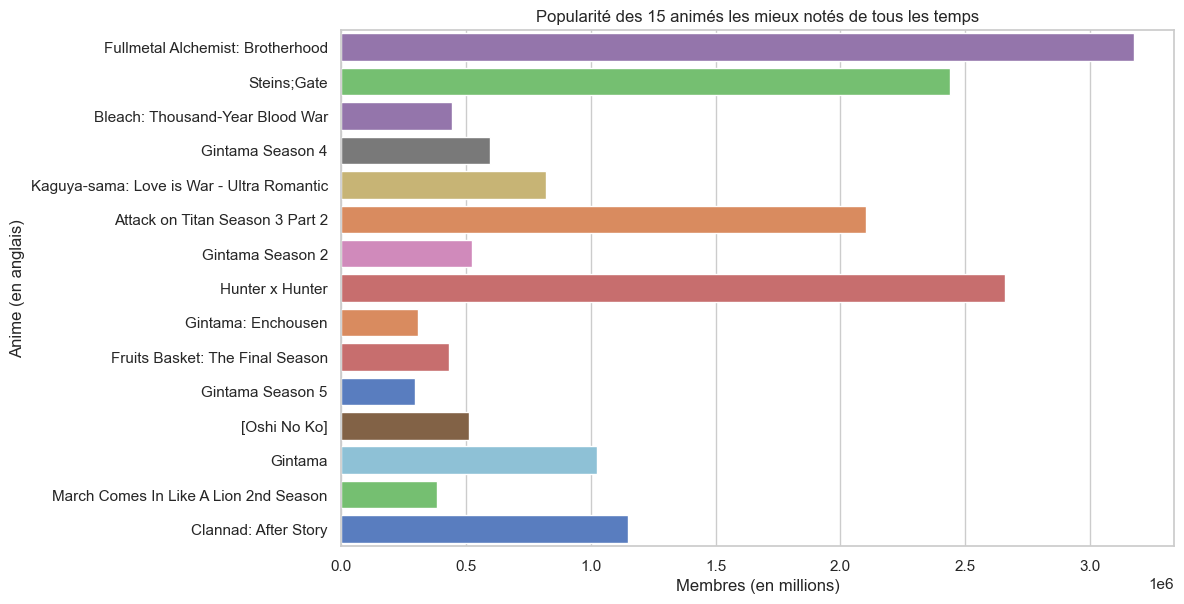

In [527]:
# --- Données : top 15 par score ---

top15_score = df_anime.sort_values(by="Score", ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x="Score", y="English name", data=top15_score, hue="Score", legend=False, palette="muted")


plt.xlabel("Score")
plt.ylabel("Anime (en anglais)")
plt.xlim(8.6, 9.2)
plt.tight_layout()
plt.title("Top 15 des animés les plus notés")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Members", y="English name", data=top15_score, hue="Members", legend=False, palette="muted")


plt.xlabel("Membres (en millions)")
plt.ylabel("Anime (en anglais)")
plt.tight_layout()
plt.title("Popularité des 15 animés les mieux notés de tous les temps")
plt.show()


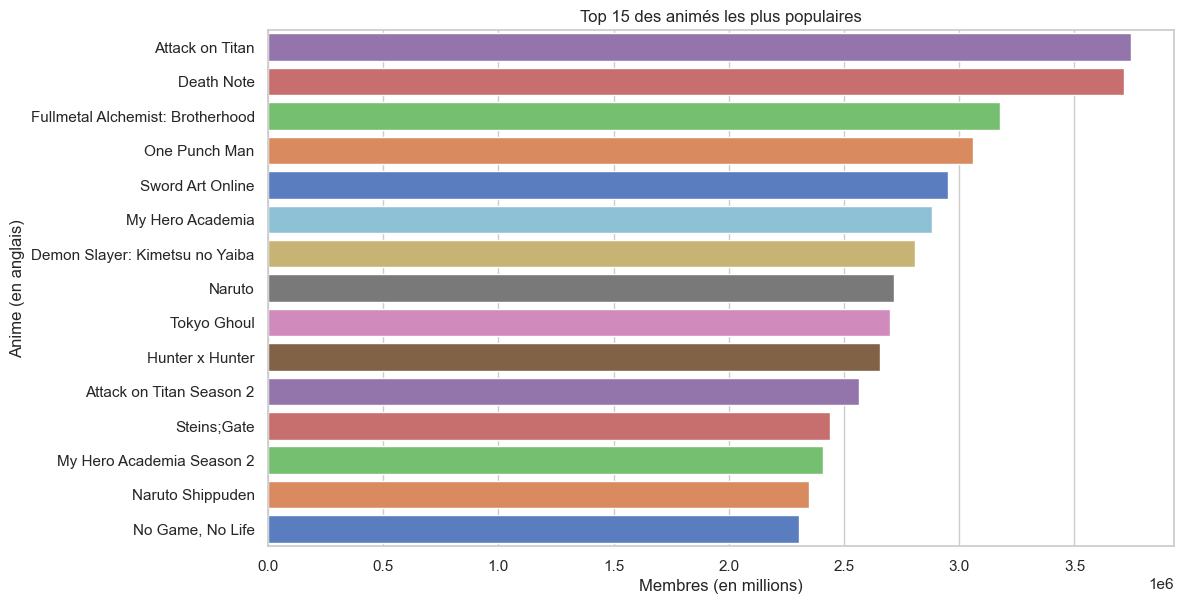

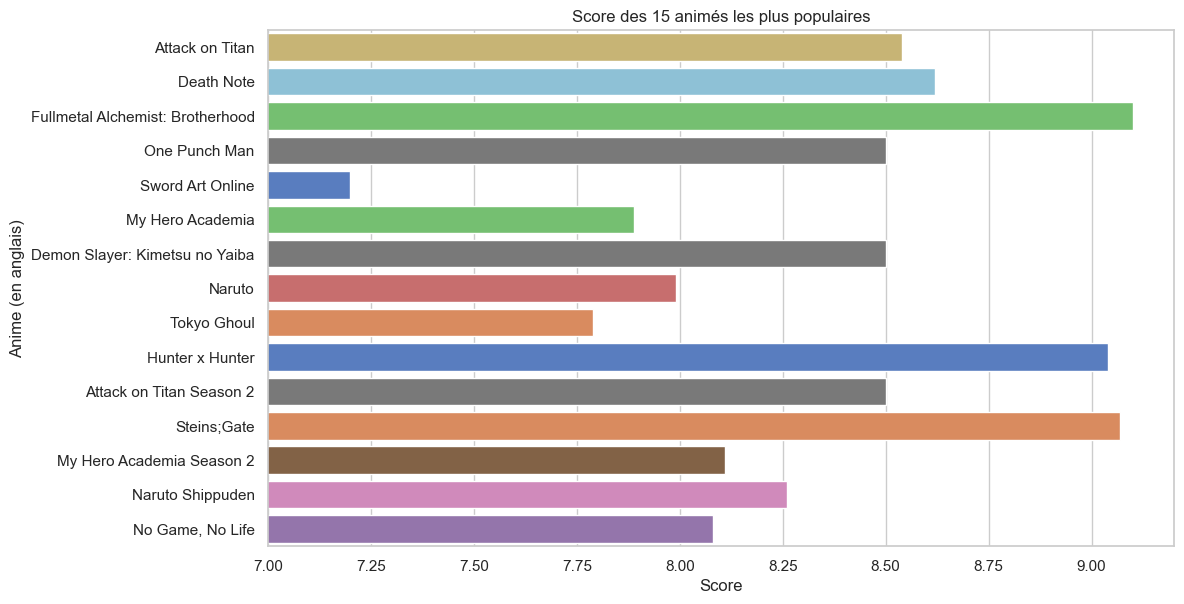

In [528]:
# --- Données : top 15 par popularité ---

top15_pop = df_anime.sort_values(by="Members", ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x="Members", y="English name", data=top15_pop, hue="Members", legend=False, palette="muted")


plt.xlabel("Membres (en millions)")
plt.ylabel("Anime (en anglais)")
plt.tight_layout()
plt.title("Top 15 des animés les plus populaires")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x="Score", y="English name", data=top15_pop, hue="Score", legend=False, palette="muted")


plt.xlabel("Score")
plt.ylabel("Anime (en anglais)")
plt.tight_layout()
plt.xlim(7, 9.2)
plt.title("Score des 15 animés les plus populaires")
plt.show()

- Une grande partie des animés populaires possèdent de bons scores, entre 8 et 9.
- Sword Art Online est le moins bien noté de loin par rapport à tous les autres.
- Fullmetal Alchemist : Brotherhood, Steins ;Gate et Hunter x Hunter sont à la fois dans le top 15 en popularité et en score.
- Il y a beaucoup moins de disparité entre le score et la popularité par rapport aux œuvres les mieux notés du site.

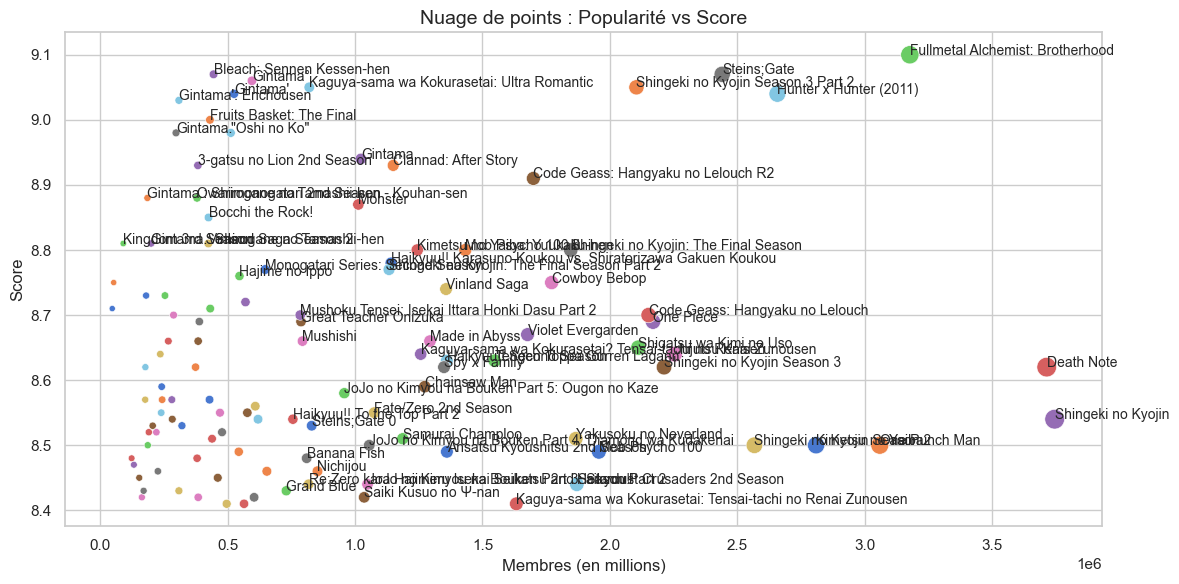

In [552]:
df_anime_limite= df_anime[df_anime["Score"]>8.4]
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df_anime_limite,
    x="Members",
    y="Score",
    size="Members",
    sizes=(20, 200),
    hue="Members",
    palette="muted",
    legend=False
)

# Ajouter les labels uniquement pour certains points
texts = []
for i in range(len(df_anime_limite)):
    if (df_anime_limite["Score"].iloc[i] > 8.75) or (df_anime_limite["Members"].iloc[i] > 700000):
        texts.append(
            plt.text(
                x=df_anime_limite["Members"].iloc[i],
                y=df_anime_limite["Score"].iloc[i],
                s=df_anime_limite["Name"].iloc[i],
                fontsize=10
            )
        )


# Mise en forme
plt.title("Nuage de points : Popularité vs Score", fontsize=14)
plt.xlabel("Membres (en millions)", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.tight_layout()
plt.show()

- Une grande partie du cluster possède entre 1 et 2 millions de membres.
- Shingeki no Kyojin et Death Note dominent de loin en termes de popularité.
- FMAB, HxH et Steins ;Gate sont également à la fois populaire et bien noté : ils laissent un gros écart au reste.
- On retrouve aussi un petit cluster parmi les moins populaires, qui possèdent toutefois de gros scores.
Nous allons donc procéder à une analyse plus poussée de ce petit cluster, renfermant des œuvres de qualité beaucoup moins côtés par la communauté.

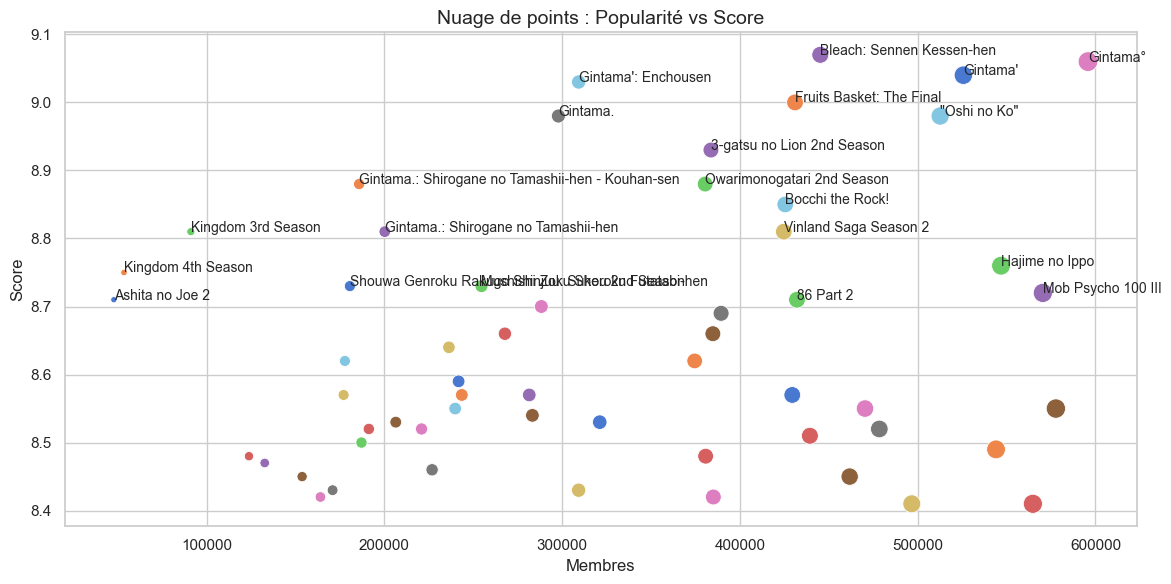

In [554]:
df_anime_limite = df_anime[(df_anime["Score"] > 8.4) & (df_anime["Members"] < 600000)]
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df_anime_limite,
    x="Members",
    y="Score",
    size="Members",
    sizes=(20, 200),
    hue="Members",
    palette="muted",
    legend=False
)

# Ajouter les labels uniquement pour certains points
texts = []
for i in range(len(df_anime_limite)):
    if df_anime_limite["Score"].iloc[i] > 8.7:
        texts.append(
            plt.text(
                x=df_anime_limite["Members"].iloc[i],
                y=df_anime_limite["Score"].iloc[i],
                s=df_anime_limite["Name"].iloc[i],
                fontsize=10
            )
        )


# Mise en forme
plt.title("Nuage de points : Popularité vs Score", fontsize=14)
plt.xlabel("Membres", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.tight_layout()
plt.show()

- Gintama domine avec ses multiples saisons parmi les animés peu côtés.
- Kingdom et Ashita no Joe 2 sont les deux anomalies remarquables, un nombre très faible pour un excellent score.
- La présence de Bleach parmi ces échantillons peut surprendre, cependant il s'agit d'une suite à l'animé s'étant terminé en 2012.

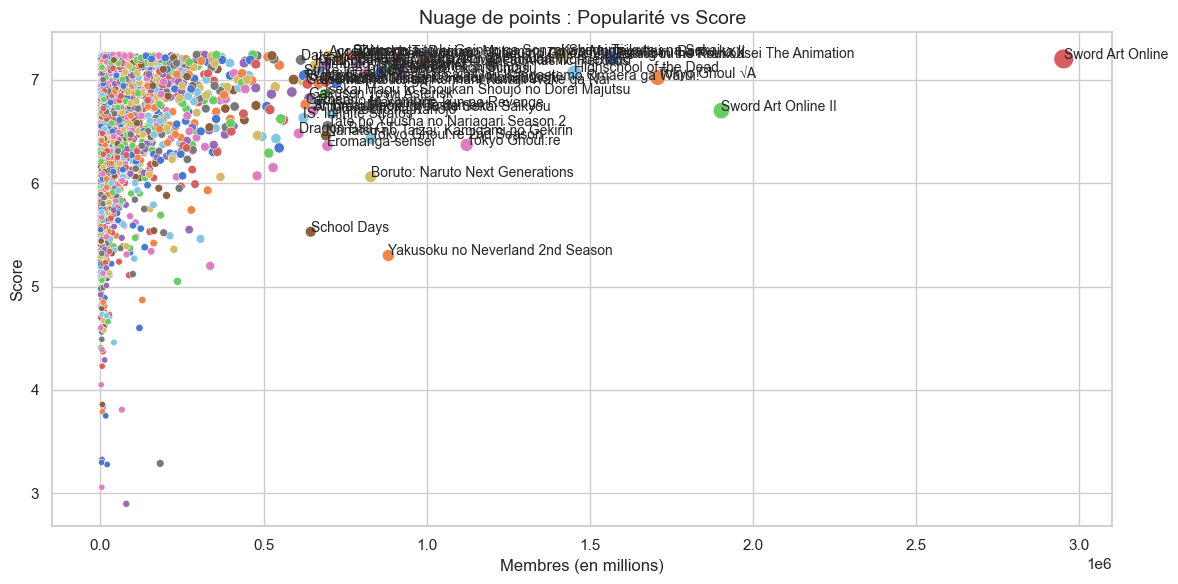

In [547]:
df_anime_limite = df_anime[df_anime["Score"] < 7.25]
plt.figure(figsize=(12, 6))

sns.scatterplot(
    data=df_anime_limite,
    x="Members",
    y="Score",
    size="Members",
    sizes=(20, 200),
    hue="Members",
    palette="muted",
    legend=False
)

# Ajouter les labels uniquement pour certains points
texts = []
for i in range(len(df_anime_limite)):
    if df_anime_limite["Members"].iloc[i] > 600000:
        texts.append(
            plt.text(
                x=df_anime_limite["Members"].iloc[i],
                y=df_anime_limite["Score"].iloc[i],
                s=df_anime_limite["Name"].iloc[i],
                fontsize=10
            )
        )


# Mise en forme
plt.title("Nuage de points : Popularité vs Score", fontsize=14)
plt.xlabel("Membres (en millions)", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.tight_layout()
plt.show()

## 2. Films d'animation

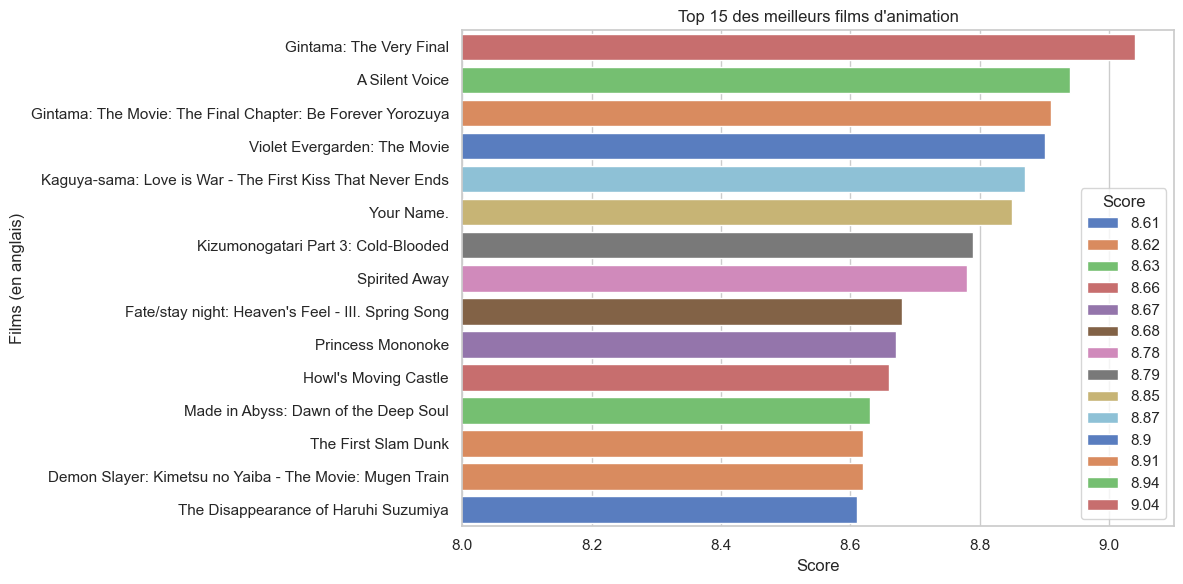

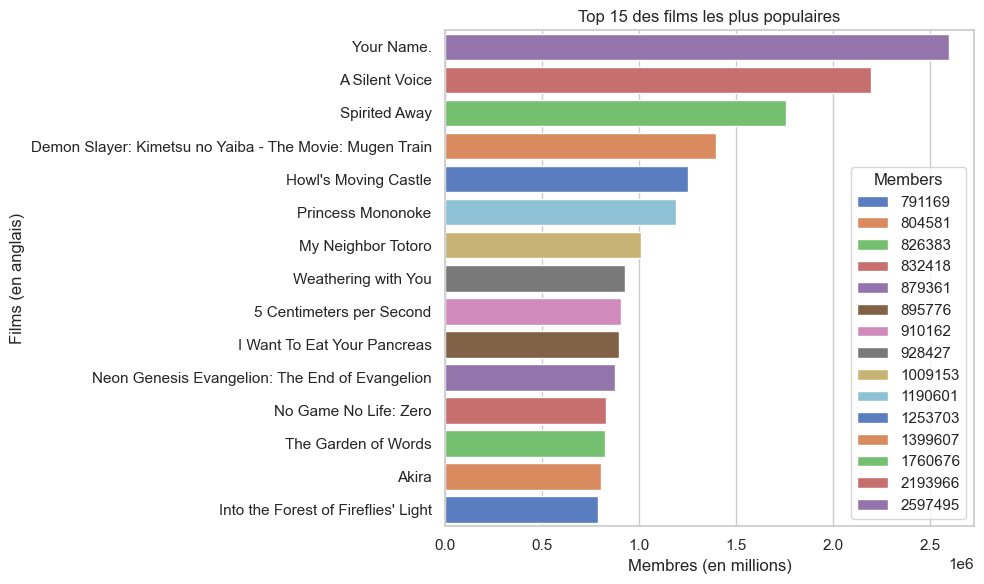

In [529]:
# On récupère uniquement les films
df_movie = df[df["Type"] == "Movie"]

# On ajoute The First Slam Dunk et No Game No Life: Zero, le titre n'étant pas disponible en anglais, et par soucis de lecture nous les afficheront dans cette langue.
df_movie.loc[df_movie["anime_id"] == 45649, "English name"] = "The First Slam Dunk"
df_movie.loc[df_movie["Name"] == "No Game No Life: Zero", "English name"] = "No Game No Life: Zero"


# --- Données : top 15 par score ---

top15_score = df_movie.sort_values(by="Score", ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top15_score,
    y="English name",
    x="Score",
    palette="muted",
    hue="Score",
)

plt.title("Top 15 des meilleurs films d'animation")
plt.xlabel("Score")
plt.ylabel("Films (en anglais)")
plt.xlim(8, 9.1)
plt.tight_layout()
plt.show()


# --- Données : top 15 par popularité (Nombre de membres) ---
top15_pop = df_movie.sort_values(by="Members", ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top15_pop,
    y="English name",
    x="Members",
    palette="muted",
    hue="Members",
)

plt.title("Top 15 des films les plus populaires")
plt.xlabel("Membres (en millions)")
plt.ylabel("Films (en anglais)")
plt.tight_layout()
plt.show()




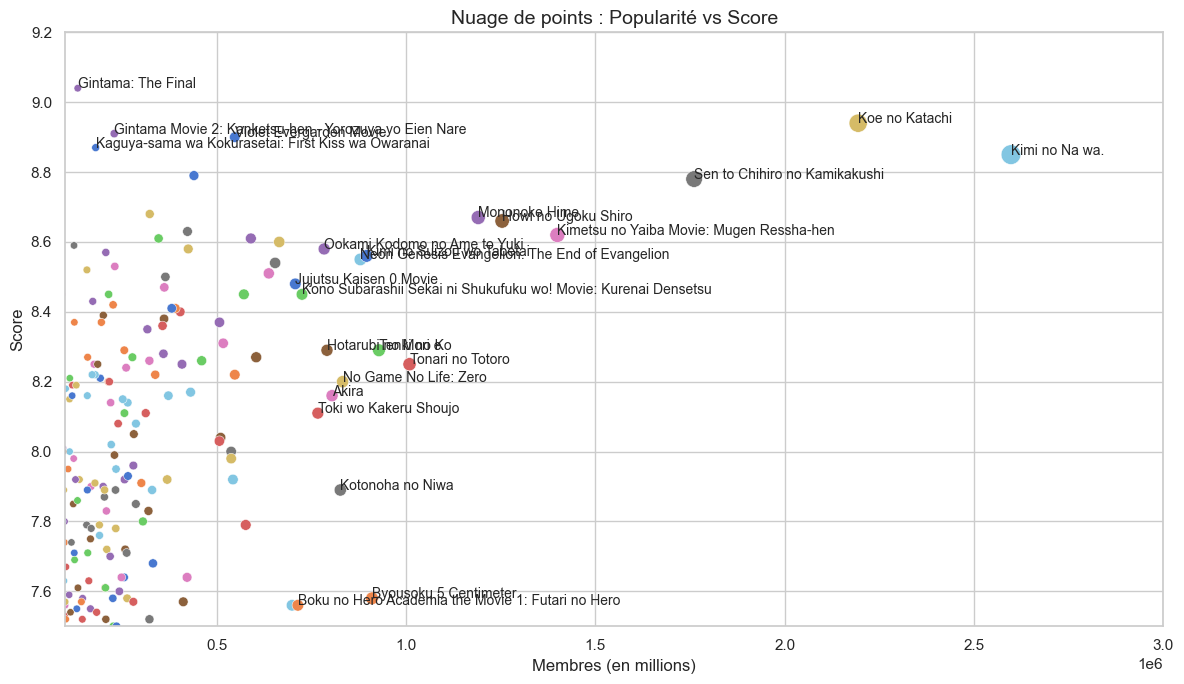

In [530]:
df_movie = df[df["Type"] == "Movie"]

plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=df_movie,
    x="Members",
    y="Score",
    size="Members",
    sizes=(20, 200),
    hue="Members",
    palette="muted",
    legend=False
)

# Ajouter les labels uniquement pour certains points
texts = []
for i in range(len(df_movie)):
    if (df_movie["Score"].iloc[i] > 8.8) or (df_movie["Members"].iloc[i] > 700000):
        texts.append(
            plt.text(
                x=df_movie["Members"].iloc[i],
                y=df_movie["Score"].iloc[i],
                s=df_movie["Name"].iloc[i],
                fontsize=10
            )
        )


# Mise en forme
plt.title("Nuage de points : Popularité vs Score", fontsize=14)
plt.xlabel("Membres (en millions)", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.ylim(7.5, 9.2)
plt.xlim(100000, 3000000)
plt.tight_layout()
plt.show()

## 3. OAV

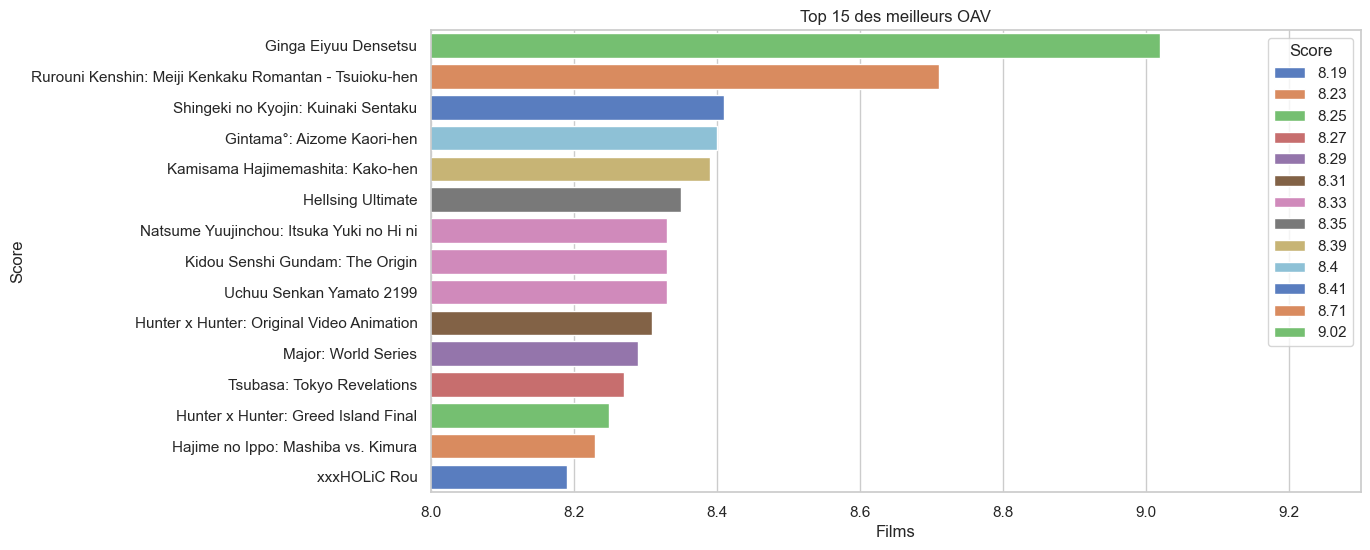

In [531]:
plt.figure(figsize=(12, 6))
df_score = df[df["Type"] == "OVA"]
top15 = df_score.sort_values(by="Score", ascending=False).head(15)
sns.barplot(data=top15, x="Score", y="Name", hue="Score", palette="muted")
plt.title("Top 15 des meilleurs OAV")
plt.xlim(8, 9.3)
plt.ylabel("Score")
plt.xlabel("Films")

plt.show()

## 4. ONA
Un ONA, ou Original Net Anime, est un animé diffusé directement sur Internet, à travers des plateformes de streaming. Il n'est donc pas diffusé à la télévision.
Nous pouvons prendre l'exemple de Netflix qui diffuse JoJo Bizarre Adventure : Stone Ocean, ou Cyberpunk Edgerunners.

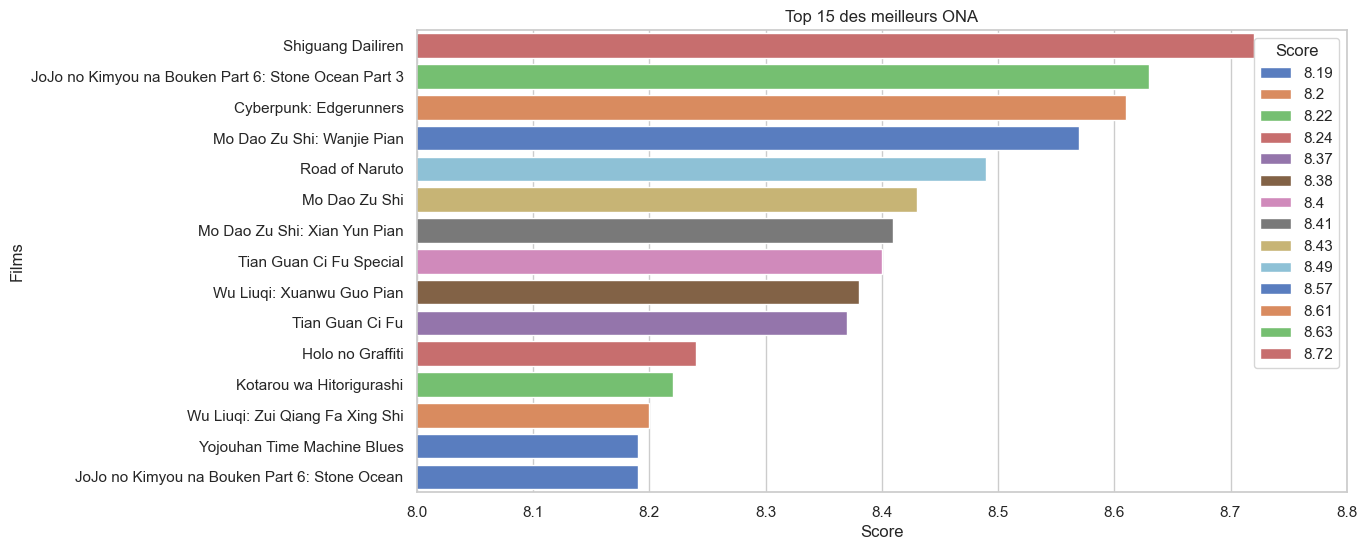

In [532]:
plt.figure(figsize=(12, 6))
df_score = df[df["Type"] == "ONA"]
top15 = df_score.sort_values(by="Score", ascending=False).head(15)
sns.barplot(data=top15, y="Name", x="Score", hue="Score", palette="muted")
plt.title("Top 15 des meilleurs ONA")
plt.xlim(8, 8.8)
plt.xlabel("Score")
plt.ylabel("Films")

plt.show()

# IV. Production
On va s'intéresser dans cette partie aux studios, sources derrière les différents animés de notre jeu de données.